# アヤメの分類サンプル（SVM，ロジスティック回帰）

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
[d.shape for d in [iris.data, iris.target]]

[(150, 4), (150,)]

In [8]:
[iris.feature_names, iris.target_names]

[['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10')]

In [9]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
import matplotlib.pyplot as plt

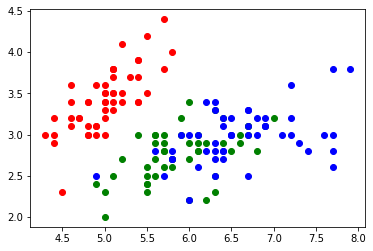

In [5]:
# 試しにプロット
plt.scatter(iris.data[:50, 0], iris.data[:50, 1], color='red', label='setosa')
plt.scatter(iris.data[50:100, 0], iris.data[50:100, 1], color='green', label='versicolor')
plt.scatter(iris.data[100:150, 0], iris.data[100:150, 1], color='blue', label='virginica')
plt.show()

In [6]:
X = iris.data
y = iris.target

In [7]:
n_train = len(X)//2
X_train, X_test, y_train, y_test = X[:n_train], X[n_train:], y[:n_train], y[n_train:]

In [8]:
from sklearn import svm

In [9]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [10]:
# 結果が良くない
clf.score(X_test, y_test)

0.3333333333333333

In [11]:
# データをシャッフルする
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(train_size=0.6, test_size=0.4, random_state=0)

In [12]:
train_index, test_index = next(ss.split(X))
X_train, y_train, X_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]

In [13]:
clf = svm.SVC(gamma=0.05)
clf.fit(X_train, y_train)

SVC(gamma=0.05)

In [14]:
# よくなった
clf.score(X_test, y_test)

0.9

In [37]:
# 学習器を変更
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9166666666666666

In [15]:
# 交差検証
from sklearn.model_selection import cross_val_score

In [17]:
scores = cross_val_score(clf, iris.data, iris.target)

In [18]:
print("cross validation scores: {}".format(scores))

cross validation scores: [0.96666667 0.96666667 0.96666667 0.96666667 1.        ]


In [20]:
import numpy as np
np.mean(scores)

0.9733333333333334

In [22]:
# 層化 k 分割交差検証
from sklearn.model_selection import KFold, StratifiedKFold
skfold = StratifiedKFold(n_splits=3)
print("cross validation scores: {}".format(cross_val_score(clf, iris.data, iris.target, cv=skfold)))

cross validation scores: [0.96 0.98 0.94]


In [23]:
# グリッドサーチ
# https://qiita.com/tomov3/items/039d4271ed30490edf7b
from sklearn.model_selection import GridSearchCV
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], 
                "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(svm.SVC(), param_grid, cv=5)

In [24]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [25]:
gs.score(X_test, y_test)

0.9166666666666666

In [26]:
gs.best_params_

{'C': 10, 'gamma': 0.1}

In [27]:
gs.best_score_

0.9888888888888889